#### SMAI Assignment Number 1
#### Name: Naveen Kumar Pandey
#### Roll No: 20173087


## Imports

In [117]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Problem 1 : Voted Perceptron

### Vanila Perceptron Implementation

In [118]:
import numpy as np
class Perceptron:
    """
    An implementation of a percepton model
    """
    def __init__(self):
        self.X=None
        self.y=None
        self.w = None
        self.b = None
        self.learning_rate=1
      
    def fit(self, X, y, epochs):
        # Initialise weights and bias
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for epoch in range(epochs):
            for i,x in enumerate(X):
                if y[i]*(np.dot(X[i], self.w)+self.b) <= 0:
                    self.w += self.learning_rate*y[i]*X[i]
                    self.b += self.learning_rate*y[i]
        return self
    
    def predict(self, X):
        y = np.dot(X, self.w) + self.b
        y[y>0]= 1
        y[y<=0]= -1
        return y

### Voted Perceptron Implementation

In [119]:
import numpy as np
class VotedPerceptron:
    """
    An implementation of a voted iipercepton model
    """
    def __init__(self):
        self.X=None
        self.y=None
        self.learning_rate=1
        # Stores a tuple of weights, biases and votes (w,b,c)
        # for each of the weight changes
        self.outputs = None 
      
    def fit(self, X, y, epochs):
        # Initialise weights and bias
        w,b,c = np.zeros(X.shape[1]), 0, 1
        self.outputs = [(w,b,c)]
        
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                w,b,c = self.outputs[-1] #Last update
                if (np.dot(X[i], w) + b)*y[i] <= 0:
                    w += self.learning_rate*y[i]*X[i]
                    b += self.learning_rate*y[i]
                    c = 1
                    self.outputs.append((w,b,c))
                else:
                    c+=1
                    self.outputs[-1] = (w,b,c)
        return self
    
    def predict(self, X):
        y_voted = []
        for w,b,c in self.outputs:
            y_k = np.dot(X,w ) + b
            y_k[y_k>0]= 1
            y_k[y_k<=0]= -1
            y_scaled = c*y_k
            y_voted.append(y_scaled.tolist())
        y = np.asarray(y_voted)
        y = y.sum(axis=0)
        y[y>0]=1
        y[y<=0]=-1
        return y

### Preparing the datasets for comparison

In [120]:
# Download the datasets
import pandas as pd
uris = [
    'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'
]

bcdataset, iodataset = [pd.read_csv(uri, header=None) for uri in uris]

In [121]:
#Ionoshpere Dataset Exploration
print('Ionoshpere Dataset Shape : {}'.format(iodataset.shape))
print(bcdataset.head(5))

# Remove rows with missing values
# No rows with missing values, skipping cleanup
print('Ionoshpere Dataset Shape After Cleanup : {}'.format(iodataset.shape))

X_io, y_io = iodataset.iloc[:,1:iodataset.shape[1]-1], iodataset.iloc[:,-1]
X_io, y_io = X_io.as_matrix() , y_io.as_matrix()

#Convert classification labels 'g', 'b' to +1, -1 for binary classification
labels = {'g':1, 'b': -1}
for key, val in labels.items():
    y_io[y_io==key] = val
print(X_io.shape)

Ionoshpere Dataset Shape : (351, 35)
        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2
Ionoshpere Dataset Shape After Cleanup : (351, 35)
(351, 33)


In [122]:
#Breast Cancer Dataset Exploration
print('Breast Cancer Dataset Shape : {}'.format(bcdataset.shape))
print(bcdataset.head(5))

# Remove rows with missing values
bcdataset.iloc[:,6] = pd.to_numeric(bcdataset.iloc[:,6], errors='coerce')
bcdataset = bcdataset.dropna()
print('Breast Cancer Dataset Shape After Cleanup : {}'.format(bcdataset.shape))

X_bc, y_bc = bcdataset.iloc[:,1:10], bcdataset.iloc[:,10]
X_bc, y_bc = X_bc.as_matrix() , y_bc.as_matrix()

#Convert classification labels 2, 4 to +1, -1 for binary classification
labels = {2:1, 4: -1}
for key, val in labels.items():
    y_bc[y_bc==key] = val

Breast Cancer Dataset Shape : (699, 11)
        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2
Breast Cancer Dataset Shape After Cleanup : (683, 11)


In [123]:
def generate_k_folds(dataset, k):
    """
    Returns a list of folds, where each fold is a tuple like (training_set, test_set), where each set is a tuple like (examples, classes)
    """ 
    folds=[]
    n=dataset[0].shape[0]
    fold_size = n//k
  
    
    # Divide the data into k equal subsections, keep k-1 section for training and 1 for testing, repeat k times to generate folds
    for i in range(k):
        indices = [j for j in range(n)]
        if i == k-1:
            fold_size = n - i*fold_size
        test_idx, training_idx = indices[i*fold_size:i*fold_size+fold_size], indices[0:i*fold_size] + indices[i*fold_size+fold_size:] 
         
        examples=dataset[0]
        classes=dataset[1]
    
        training_set_examples=examples[training_idx,:]
        training_set_classes=np.array(classes)[training_idx]
        training_set=(training_set_examples,training_set_classes)
        
        test_set_examples=examples[test_idx,:]
        test_set_classes=np.array(classes)[test_idx]
        test_set=(test_set_examples,test_set_classes)
        fold =(training_set,test_set)
        folds.append(fold)
    return folds 

In [124]:
def accuracy(predicted, actual):
    """
    Returns a score denoting percentage of correct predictions 
    """
    return np.mean(predicted == actual)
def get_model_accuracy(model, X_train, y_train, X_test, y_test, epochs):
    """
    Trains a model on train set and returns the model's accuracy score on test set
    """
    model.fit(X_train, y_train, epochs=epochs)
    prediction = model.predict(X_test)
    return accuracy(prediction, y_test)

def k_fold_cross_validation_accuracy(model_name, folds, epochs):
    """
    Trains the model and returns its k-fold cross validation accuracy
    """
    scores = []
    for i, fold in enumerate(folds):
        train, valid = fold
        X_valid, y_valid = valid
        X_train, y_train = train
        model = get_model_by_name(model_name)
        scores.append(get_model_accuracy(model, X_train, y_train, X_valid, y_valid, epochs))
    k_fold_cross_validation_accuracy = 0
    if len(scores) > 0:
        k_fold_cross_validation_accuracy = sum(scores)/len(scores)
    return k_fold_cross_validation_accuracy

def get_model_by_name(model_name):
    """
    Returns an intance of the given model name
    """
    if model_name == 'Perceptron':
        return Perceptron()
    elif model_name == 'VotedPerceptron':
        return VotedPerceptron()
    return None

def generate_comparision_result(X, y, num_of_folds, epochs_list, model_names):
    """
    Returns an array of accuracy scores. Each element in the array corresponds to
    the accuracy scores of various models for an epoch in given epoch list. 
    """
    scores_per_epoch = []
    voted_perceptron_score_per_epoch = []
    folds = generate_k_folds([X,y],num_of_folds)
    for epochs in epochs_list:
        scores_per_model = []
        for model_name in model_names:
            scores_per_model.append(k_fold_cross_validation_accuracy(model_name, folds, epochs))
        scores_per_epoch.append(scores_per_model)
    return scores_per_epoch

In [125]:
def plot_comparison_results(dataset_name, comparison_results, epoch_list):
    """
    Utility method to plot the model comparision results
    """
    perceptron_result = comparison_results[:,0].reshape([-1])
    print(perceptron_result)
    voted_perceptron_result = comparison_results[:,1].reshape([-1])
    print(voted_perceptron_result)
    fig, ax = plt.subplots()
    ax.set_title('Model Comparison For {}'.format(dataset_name))
    ax.plot(epoch_list, perceptron_result, label="Vanilla Perceptron")
    ax.plot(epoch_list, voted_perceptron_result, label="Voted Perceptron")
    leg = ax.legend();
    plt.show()
    

### Model Comparison

[ 0.84857143  0.84201058  0.84857143  0.85142857  0.85142857  0.85714286
  0.85428571  0.84857143  0.84857143]
[ 0.85428571  0.84772487  0.85428571  0.85142857  0.84857143  0.84772487
  0.85428571  0.84571429  0.84857143]


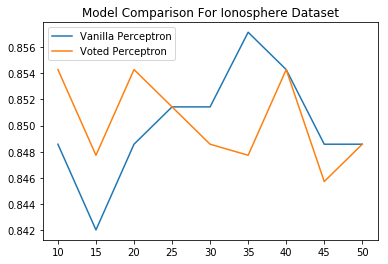

In [126]:
model_names = ['Perceptron','VotedPerceptron']
epoch_list = [10,15, 20, 25, 30, 35, 40, 45, 50]


iodataset_results =  generate_comparision_result(X_io, y_io, 10, epoch_list, model_names)
plot_comparison_results('Ionosphere Dataset', np.asarray(iodataset_results) , epoch_list)


[ 0.95360963  0.95360963  0.95294118  0.95147059  0.96029412  0.95147059
  0.95588235  0.96390374  0.96470588]
[ 0.91671123  0.92713904  0.87205882  0.93676471  0.91831551  0.92352941
  0.88743316  0.95053476  0.95508021]


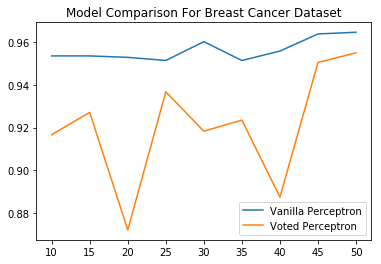

In [127]:
bcdataset_results = generate_comparision_result(X_bc, y_bc, 10, epoch_list, model_names)
plot_comparison_results('Breast Cancer Dataset', np.asarray(bcdataset_results) , epoch_list)

### Problem 1 Comments

As we can observe from the above computations, we do incur additional computational expense due to  maintenance and storgae of weight updates and votes.  However, the number of mistakes is upper bounded by a function of the gap between the positive and negative examples. Also, good prediction vectors tend to survive for a longer time and thus have larger weight in the majority vote, minimising the overhead. 

## Problem 2: Least Square Approach

### Data Preparation

In [128]:
# Representing dataset D1 with 8 samples (Each class with 4 samples) and 2 features as 8x2 matrix XD1 
# and corresponding binary class labels for 8 samples as 1-d (8x1 matrix) vector yD1
# Value at any given index i in yD1 corresponds to class label for sample i in XD1
# Value 1 in yD1  represents class label 1 and 0 represents (class label 2) 
     #x1   x2
XD1=np.asarray([[ 3,   3],
     [ 3,   0],
     [ 2,   1],
     [ 0,   2],
     [-1,   1],
     [ 0,   0],
     [-1,  -1],
     [ 1,   0]])
 
yD1=np.asarray([1,1,1,1,0,0,0,0])

# Representing dataset D2 with 8 samples (Each class with 4 samples) and 2 features as 8x2 matrix XD2 
# and corresponding binary class labels for 8 samples as 1-d (8x1 matrix) vector yD2
# Value at any given index i in yD1 corresponds to class label for sample i in XD2
# Value 1 in yD2  represents class label 1 and 0 represents (class label 2) 
     #x1   x2
XD2=np.asarray([[ 3,   3],
     [ 3,   0],
     [ 2,   1],
     [ 0, 1.5],
     [-1,   1],
     [ 0,   0],
     [-1,  -1],
     [ 1,   0]])
 
yD2=np.asarray([1,1,1,1,0,0,0,0])            

###  Least Square Linear Classifier Implementation

In [129]:
import numpy
class LMS:
    def __init__(self):
        self.X=None
        self.y=None
        self.W = None
        self.b = None
        self.learning_rate=1
        self.error_threshold = 0.0001
 
      
    def fit(self, X, y):
        # Initialise weights and bias
        self.w = np.zeros(len(X[0]))
        for i,x in enumerate(X):
            error = (y[i] - np.dot(X[i], self.w))
            self.w += self.learning_rate*error*X[i]
        return self
    
    def predict(self, X):
        y = np.dot(X, self.w)
        for i in range(y.shape[0]):
            if y[i] > self.error_threshold:
                y[i] = 1
            else:
                y[i] = 0
        return y

In [130]:
import numpy
class LDA:
    def __init__(self):
        self.X=None
        self.y=None
        self.class_labels= None
        self.mean_vectors = None
        self.overall_mean = None
        self.S_W = None
        self.S_B = None
        self.W = None
        self.projection_centroids = {}
        self.classifier_threshold = 0
 
    def compute_classwise_mean_vectors(self):
        mean_vectors = {}
        class_labels = self.get_class_labels()
        for class_label in class_labels:
            mean_vectors[class_label] = (np.mean(self.X[self.y==class_label], axis=0))
        return mean_vectors
    
    def compute_overall_mean(self):
        return np.mean(self.X, axis=0)
    
    def get_class_labels(self):
        if self.class_labels is not None:
            return self.class_labels
        else:
            return np.unique(self.y)
        
    def compute_within_class_scatter(self):
        # Compute within class scatter matrix
        num_of_features=self.X.shape[1]
        if self.mean_vectors is None:
            self.mean_vectors = self.compute_classwise_mean_vectors()
        self.S_W = np.zeros((num_of_features, num_of_features))
        for class_label, mean_vector in self.mean_vectors.items():
            class_scatter_matrix = np.zeros((num_of_features, num_of_features))
            #Compute scatter within each class
            for sample in self.X[self.y == class_label]:
                class_scatter_matrix += np.outer((sample - mean_vector), (sample - mean_vector))
            self.S_W +=class_scatter_matrix
        
    def compute_between_class_scatter(self):
        num_of_features=self.X.shape[1]
        if self.mean_vectors is None:
            self.mean_vectors = self.compute_classwise_mean_vectors()
        
        if self.overall_mean is None:
            self.overall_mean = self.compute_overall_mean()

        self.S_B = np.zeros((num_of_features, num_of_features))
        for class_label, mean_vector in self.mean_vectors.items():
            num_of_samples_per_class = self.X[self.y==class_label].shape[0]
            self.S_B += np.multiply(num_of_samples_per_class,
                                   np.outer((mean_vector - self.overall_mean), 
                                            (mean_vector - self.overall_mean)))
        
    def compute_linear_discriminants(self, num_of_dimensions):
        
        if self.S_W is None:
            self.compute_within_class_scatter()
        if self.S_B is None:
            self.compute_between_class_scatter()
        eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(self.S_W).dot(self.S_B))

        #Sort the (eig_value, eig_vec) pair in decreasing order
        eigen_pairs = [(eig_vals[i], eig_vecs[:, i]) for i in range(len(eig_vals))]
        sorted_eigen_pairs = sorted(eigen_pairs, key = lambda x : x[0], reverse = True)

        num_of_features = self.X.shape[1]
        self.W = np.hstack([eigen_pairs[i][1].reshape(num_of_features, 1) for i in range(0, num_of_dimensions)])
        return self
        
    def fit(self, X,y):
        if (X is None or y is None) or X.shape[0] != y.shape[0]:
            raise ValueError('Invalid data!')
        else:
            self.X = X
            self.y = y
        number_of_dimensions = self.get_class_labels().shape[0] - 1 #We can have C-1 discriminants
        self.compute_linear_discriminants(number_of_dimensions)
        
        print(self.W)
        # Since LDA maps the data linearly in the direction of W, and we have only two classes
        # It would be reasonable to assume the classifier threshold to be the centroid of the mean vectors
        for class_label, mean_vector in self.mean_vectors.items():
            self.projection_centroids[class_label] = np.dot(mean_vector, self.W)[0]
        self.classifier_threshold = sum(self.projection_centroids.values())/len(self.projection_centroids.values()) #Centroid of the centroids of the projected classes
        return self
            
    def transform(self,X):
        if self.W is None:
            raise ValueError('Trying to transform feature space without computing linear discriminants! Make sure you have called fit() before applying transform()')
        return np.dot(X, self.W)
    
    def predict(self,X):
        y = np.dot(X,self.W)
        class_label_0 = self.get_class_labels()[0]
        class_label_1 = self.get_class_labels()[1]
        for i in range(y.shape[0]):
            if y[i] >= self.classifier_threshold and self.projection_centroids[class_label_0] < self.classifier_threshold :
                y[i] = class_label_1
            else:
                y[i] = class_label_0
        return y

### Plotting Utils

In [131]:
# Note: Below plotting idea have been taken from  
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


### Dataset 1 Exploration

[[ 0.74651327]
 [ 0.66537052]]


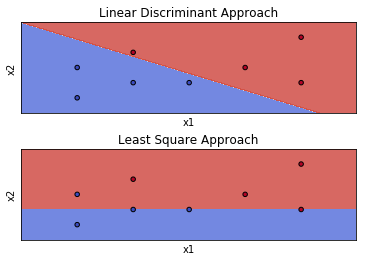

In [132]:
X = XD1
y = yD1

#Create instances of LMS and LDA models
models = (LDA(), LMS())
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('Linear Discriminant Approach',
          'Least Square Approach',)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Dataset 2 Exploration

[[ 0.78102704]
 [ 0.62449721]]


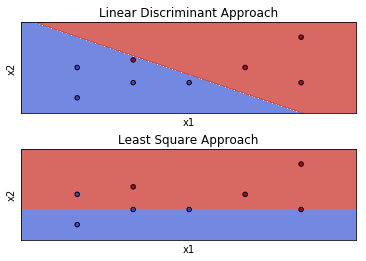

In [133]:
X = XD2
y = yD2

#Create instances of LMS and LDA models
models = (LDA(), LMS())
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('Linear Discriminant Approach',
          'Least Square Approach',)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Problem 2 Comment:

In both the datasets, Linear Discriminant Approch gives better results. 
As we can observe clearly, Least Squares approach is trying to estimate w such that the model predictions are as close as possible to a set of target values making it more susceptible to any aberration to unseen data.
On the other hand, LDA is trying to find the direction of the line that best separates the data by identifying the projection W that maximises between-class variance while minimising in class variance.


 ## Problem 3: Latent Semantic Analysis

In [134]:
import os
from collections import Counter
print(os.getcwd())
class DataLoader:
    def __init__(self):
        self.train = []
        self.valid = []
        self.test = []
        
    def read_from_directory(self, data_dir, train='train', test ='test', val_split=.2):
        """
        Reads train and test set from the given input directory.
        Assumes the data is divided into train and test folder.
        Each of the test and train are futher divided into sub folder by class labels
        Example:
        /directory
        |--/test
        |----/label1
        |----/labeln
        |
        |--/train
        |----/label1
        |----/labeln
        """
        X = []
        y = []
        path_extension = 'txt'
        
        if train is not None and len(train)>0:
            for root, dirs, files in os.walk(os.path.join(data_dir,train)):
                for file in files:
                    if file.endswith(path_extension):
                        paths = root.split('/')
                        document_label = paths[-1]
                        document_id = "{}{}".format(document_label, file.split('.')[0])
                        with open(os.path.join(root,file), 'rb') as f:
                            wordcounter = Counter(f.read().strip().split())
                            doc_word_frequency = [document_id,wordcounter ,document_id]
                            self.train.append(doc_word_frequency)
                                             
        if test is not None and len(test)>0:
            for root, dirs, files in os.walk(os.path.join(data_dir,train)):
                for file in files:
                    if file.endswith(path_extension):
                        paths = root.split('/')
                        document_label = paths[-1]
                        document_id = "{}{}".format(document_label, file.split('.')[0])
                        with open(os.path.join(root,file),'rb') as f:
                            wordcounter = Counter(f.read().strip().split())
                            doc_word_frequency = [document_id,wordcounter ,document_id]
                            self.test.append(doc_word_frequency)
                    

/Users/naveenpandey/Projects/learn/smai


In [135]:
!pwd

/Users/naveenpandey/Projects/learn/smai


In [136]:
data_dir = '/Users/naveenpandey/Projects/learn/smai/dataset' #Full path
dataloader = DataLoader()
dataloader.read_from_directory(data_dir, train='train', test=None)